In [2]:
import pandas as pd
import numpy as np

summary_df = pd.read_csv("data/waveform_summary.csv")
summary_df.head()

,event_id,magnitude,snr1,snr2,snr3,waveform_file,gap1,gap2,gap3
0,20170504230420,1.5,0.789505,0.669106,6.062811,./data/waveforms/HH/20170504230420_ERIK_HH.mseed,0.0,0.0,0.0
1,20140314175500,2.3,5.010262,1.910753,5.753783,./data/waveforms/HH/20140314175500_CTKS_HH.mseed,0.0,0.0,0.0
2,20150925010033,1.6,1.261854,1.096219,1.218887,./data/waveforms/HH/20150925010033_GULT_HH.mseed,0.0,0.0,0.0
3,20150727195655,1.8,1.581244,1.658941,2.756307,./data/waveforms/HH/20150727195655_ENEZ_HH.mseed,0.0,0.0,0.0
4,20230318222022,2.1,155.485221,24.352586,197.718550,./data/waveforms/HH/20230318222022_YLV_HH.mseed,0.0,0.0,0.0


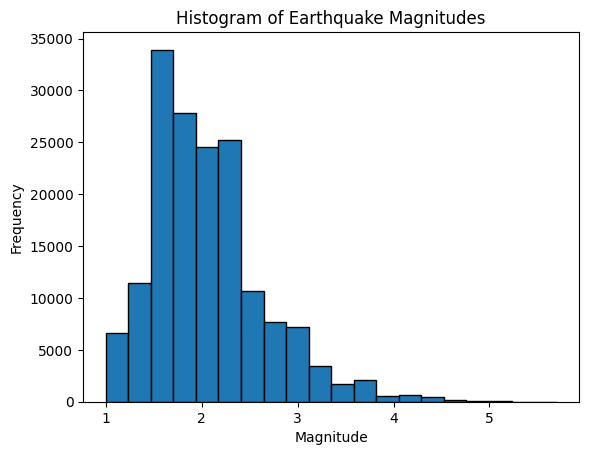

In [3]:
# create a histogram of magnitudes
import matplotlib.pyplot as plt

plt.hist(summary_df["magnitude"], bins=20, edgecolor='black')
plt.title("Histogram of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

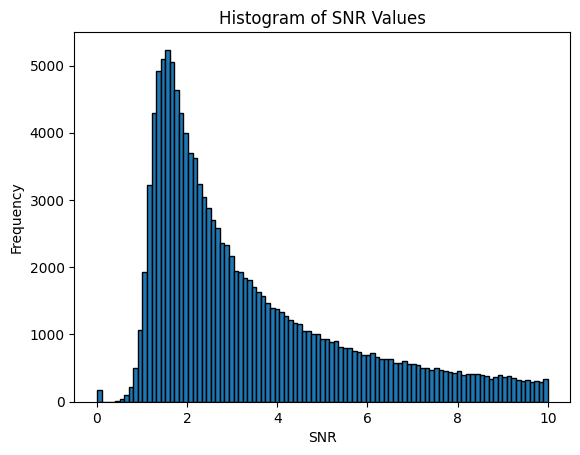

In [4]:
# for snr
# choose specific bins
# first, find the min snr column using the min of 3 columns snr1, snr2, snr3
# summary_df["snr_min"] = summary_df[["snr1", "snr2", "snr3"]].min(axis=1)
# summary_df["snr_mean"] = summary_df[["snr1", "snr2", "snr3"]].mean(axis=1)
summary_df["snr_max"] = summary_df[["snr1", "snr2", "snr3"]].max(axis=1)

plt.hist(summary_df["snr_max"].dropna(), bins=np.linspace(0, 10, 100), edgecolor='black')
plt.title("Histogram of SNR Values")
plt.xlabel("SNR")
plt.ylabel("Frequency")
plt.show()

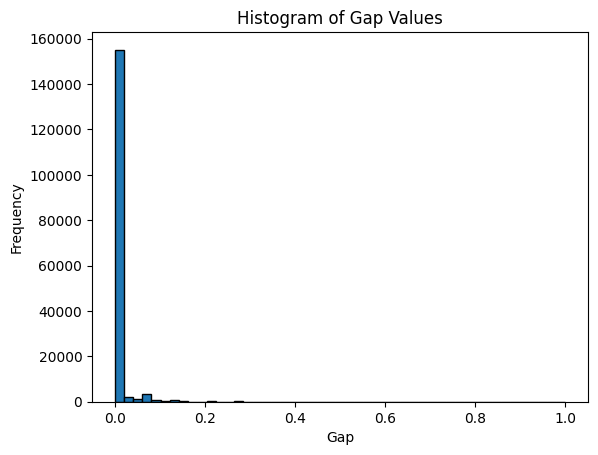

In [9]:
summary_df["gap_max"] = summary_df[["gap1", "gap2", "gap3"]].max(axis=1)

plt.hist(summary_df["gap_max"].dropna(), bins=np.linspace(0, 1, 50), edgecolor='black')
plt.title("Histogram of Gap Values")
plt.xlabel("Gap")
plt.ylabel("Frequency")
plt.show()

In [10]:
# low_snr_ratio = (summary_df["snr_max"] < 2).sum() / len(summary_df)
# print(f"Ratio of waveforms with SNR < 2: {low_snr_ratio:.2%}")

# find the number of rows where snr_max > 1.5 and gap_max = 0
high_snr_low_gap = summary_df[(summary_df["snr_max"] > 1.5) & (summary_df["gap_max"] == 0)]
ratio_high_snr_low_gap = len(high_snr_low_gap) / len(summary_df)
print(f"Ratio of waveforms with SNR > 1.5 and Gap = 0: {ratio_high_snr_low_gap:.2%}")

Ratio of waveforms with SNR > 1.5 and Gap = 0: 80.46%


In [13]:
# save the high_snr_low_gap
high_snr_low_gap.to_csv("data/high_snr_low_gap_waveforms.csv", index=False)

Waveform File: ./data/waveforms/HN/20210426135924_SUSR_HN.mseed, SNR: 2.199472107966196


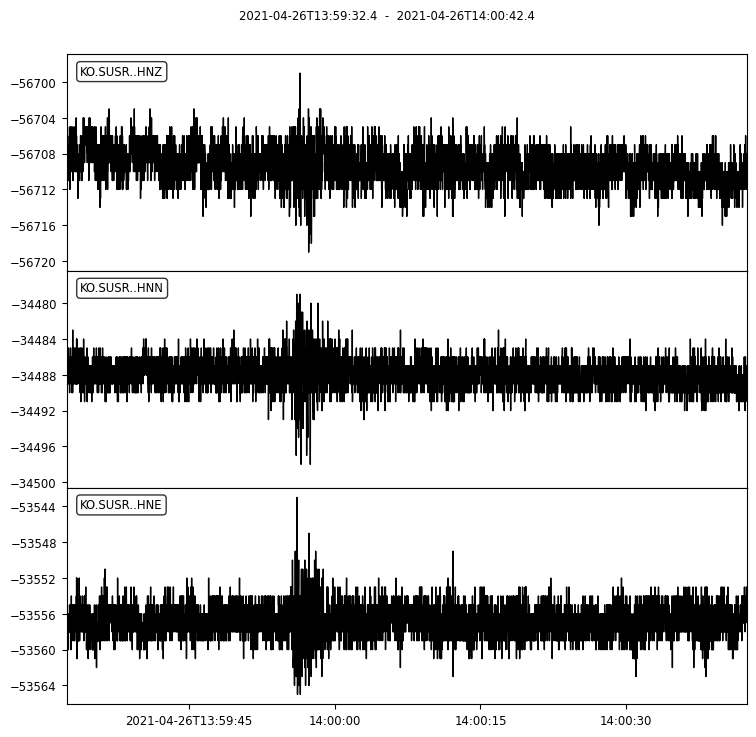

Waveform File: ./data/waveforms/HH/20201211044031_KCTX_HH.mseed, SNR: 5.274689035934569


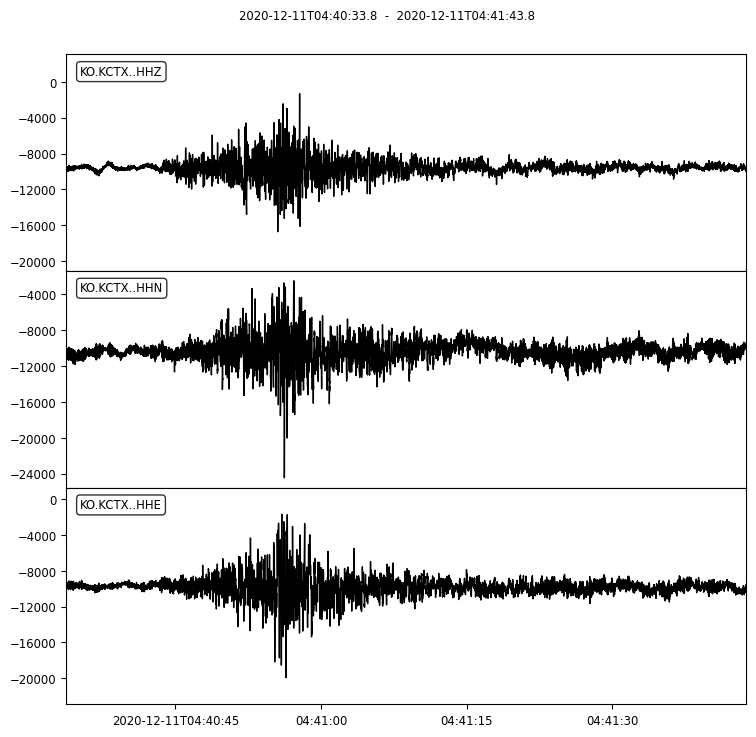

Waveform File: ./data/waveforms/HN/20200906024547_TUZL_HN.mseed, SNR: 6.766802247515266


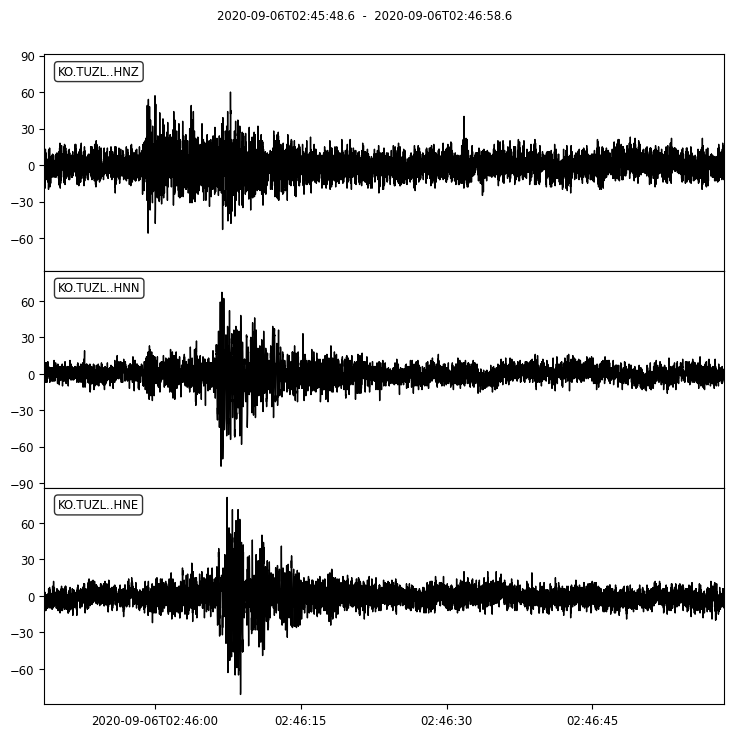

Waveform File: ./data/waveforms/HH/20160326025017_ISK_HH.mseed, SNR: 37.960250916553306


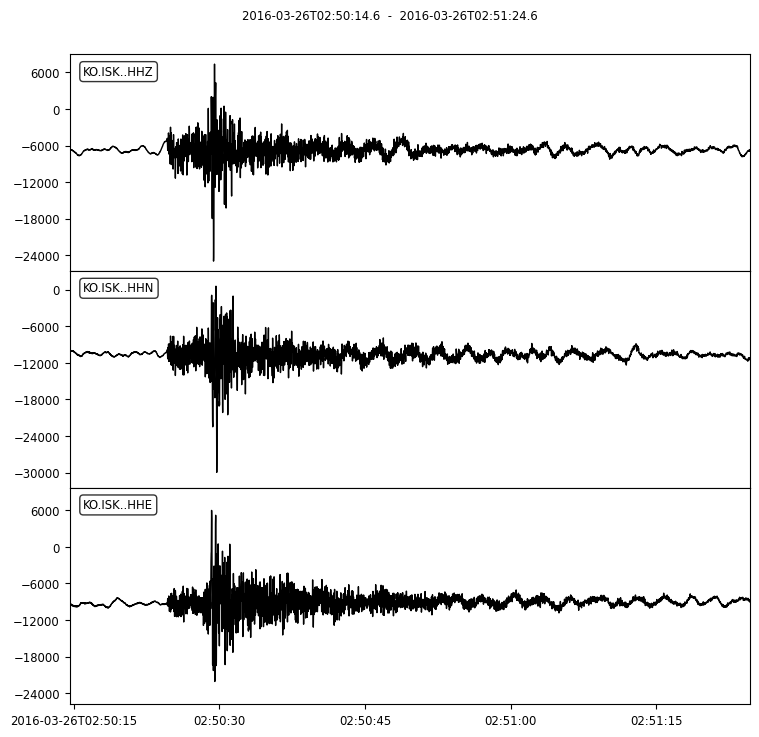

Waveform File: ./data/waveforms/HN/20190731224304_EZNE_HN.mseed, SNR: 1.9944483305831755


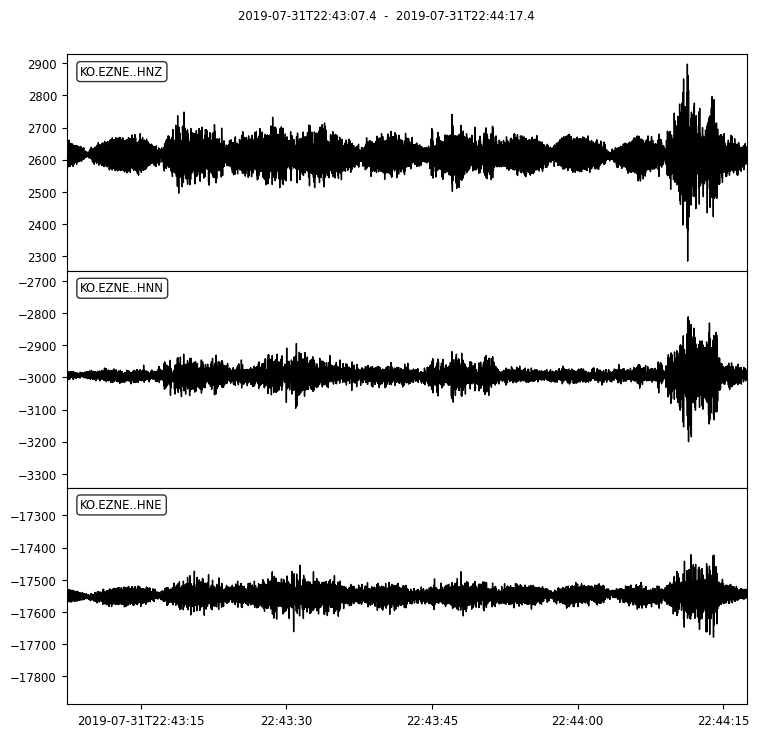

Waveform File: ./data/waveforms/HN/20201207142523_DST_HN.mseed, SNR: 1.2787890302543976


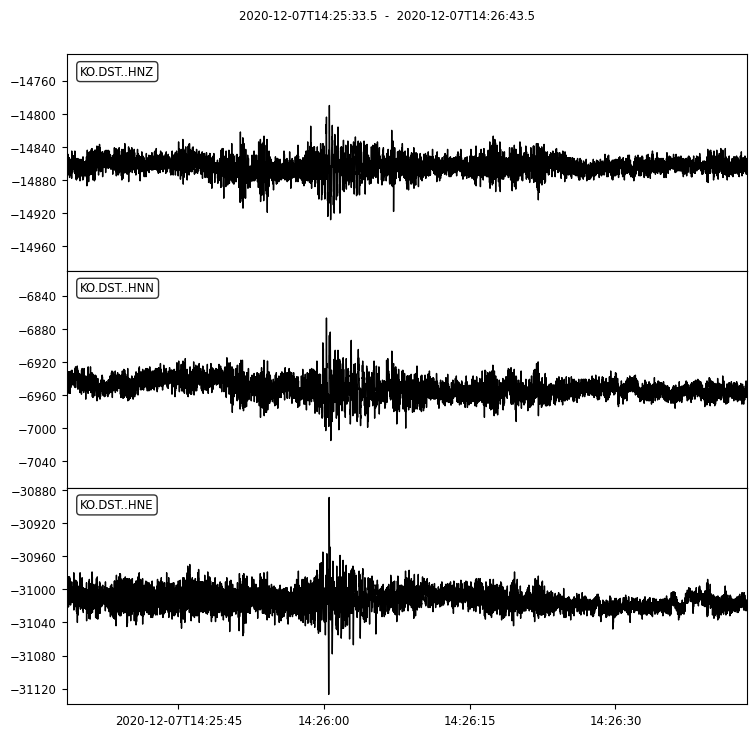

Waveform File: ./data/waveforms/HH/20190415014811_RKY_HH.mseed, SNR: 22.793776950911887


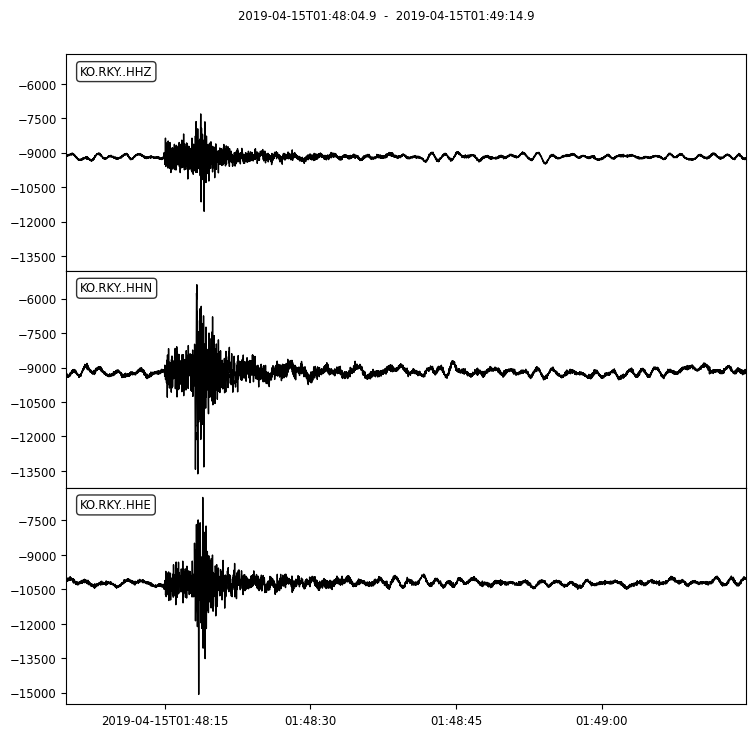

Waveform File: ./data/waveforms/HH/20201029012303_YAYO_HH.mseed, SNR: 3.1243059351777007


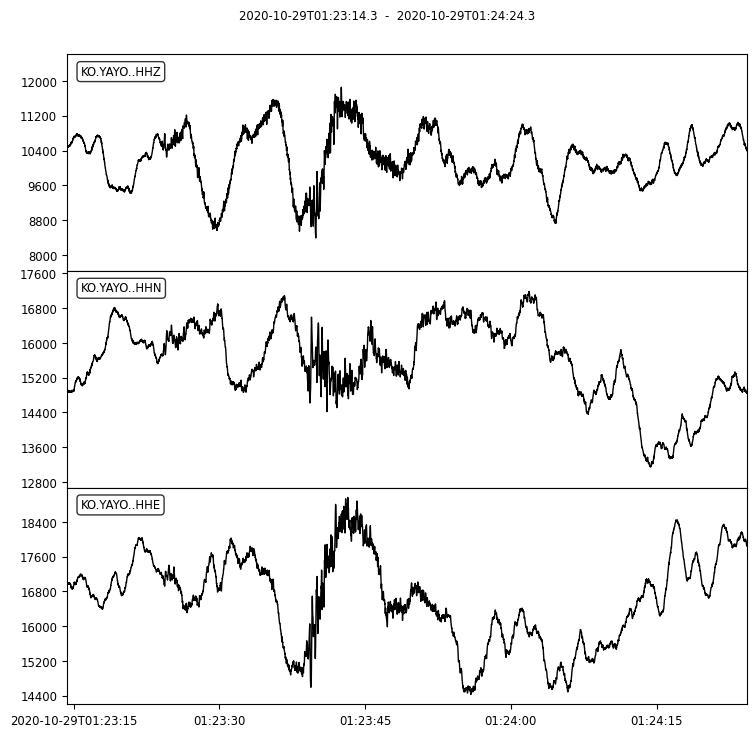

Waveform File: ./data/waveforms/HN/20200528210405_DST_HN.mseed, SNR: 2.1562194793239957


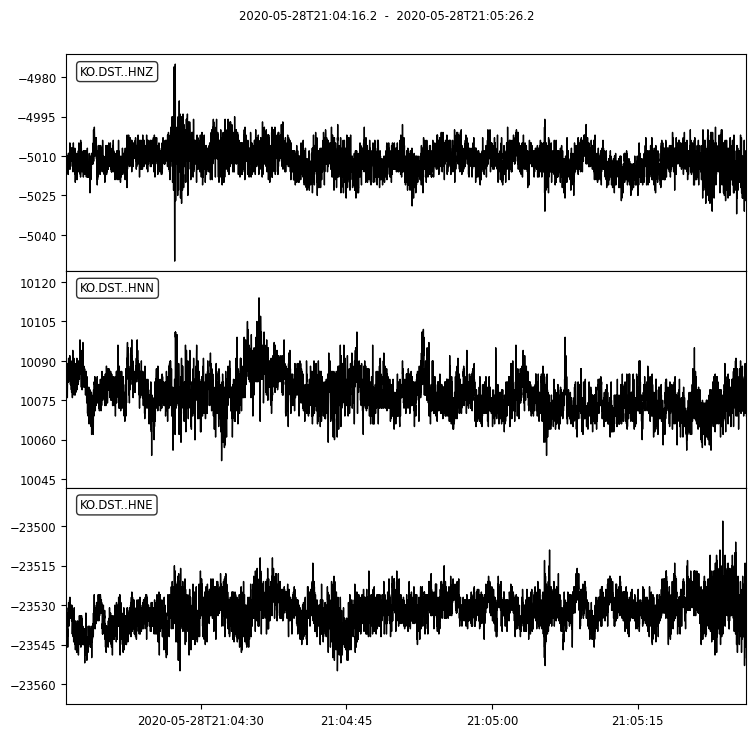

Waveform File: ./data/waveforms/HH/20241201202854_SILT_HH.mseed, SNR: 3.775307024849721


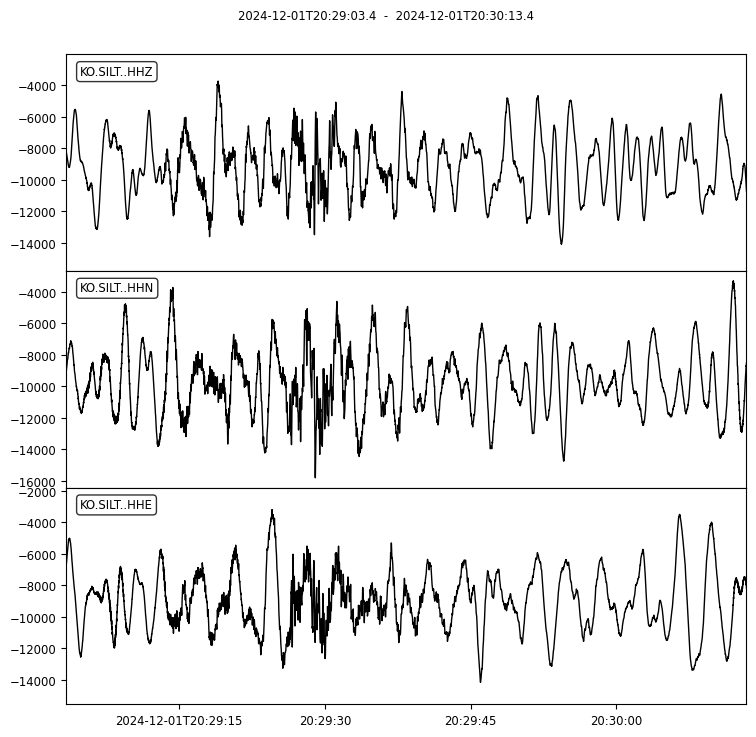

In [ ]:
import obspy
# Show 10 random samples of waveforms and print the snrs
sampled_df = summary_df.sample(10)
for index, row in sampled_df.iterrows():
    print(f"Waveform File: {row['waveform_file']}, SNR: {row['snr_max']}")
    st = obspy.read(row['waveform_file'])
    st.plot()
    # plt.title(f"Waveform: {row['waveform_file']}, SNR: {row['snr']}")
    # plt.show()
